In [103]:
import numpy as np 
import pandas as pd

In [104]:
df = pd.read_csv("heart.csv", sep=',',header=None)
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [106]:
df = pd.read_csv('heart.csv')

In [107]:
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (303, 14)


In [108]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [110]:
# 1. age
# 2. sex
# 3. chest pain type (4 values)
# 4. resting blood pressure
# 5. serum cholestoral in mg/dl
# 6. fasting blood sugar > 120 mg/dl
# 7. resting electrocardiographic results (values 0,1,2)
# 8. maximum heart rate achieved
# 9. exercise induced angina
# 10. oldpeak = ST depression induced by exercise relative to rest
# 11. the slope of the peak exercise ST segment
# 12. number of major vessels (0-3) colored by flourosopy
# 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# target 1 or 0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [146]:
#look for null values
null_counts = df.isnull().sum()
null_counts

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
sex_id           0
heart_disease    0
dtype: int64

In [113]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [114]:
age = df['age']

In [115]:
# list ages in data set
age.value_counts().sort_index()

29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
# The youngest age is 29. The oldest age is 77. 

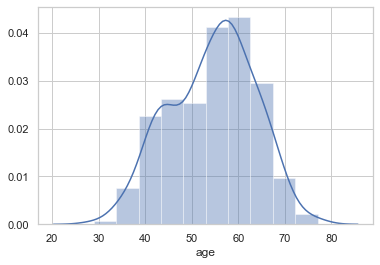

In [147]:
ag = sns.distplot(age, bins=10)
plt.show()

In [134]:
# The mean age of patients in the data set
age.mean()

54.366336633663366

In [136]:
# The median age of patients in the data set
age.median()

55.0

In [138]:
# Distribution is normal

In [117]:
hd = df['target']

In [118]:
#check that heart disease has only 2 options
hd.nunique()

2

In [119]:
#show all values of heart disease column
hd.unique()

array([1, 0])

In [120]:
sex = df['sex']

In [121]:
#show all values of sex column
sex.unique()

array([1, 0])

In [123]:
# create new column labeling the sex of patient 1 = male, 0 = female
df['sex_id'] = np.where(df['sex']==1, 'male', 'female')

In [124]:
sex_id = df['sex_id']

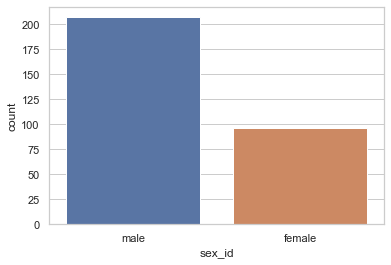

In [129]:
x = sns.countplot(x=sex_id)

In [126]:
# create new column labeling whether the patient has heart disease, 1 = yes, 0 = no
df['heart_disease'] = np.where(df['target']==1, 'yes', 'no')

In [127]:
heart_disease = df['heart_disease']

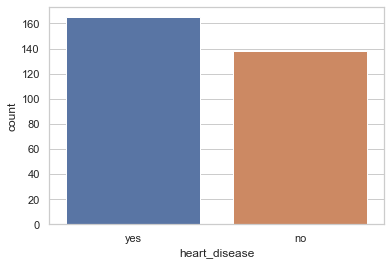

In [128]:
x = sns.countplot(x=heart_disease)

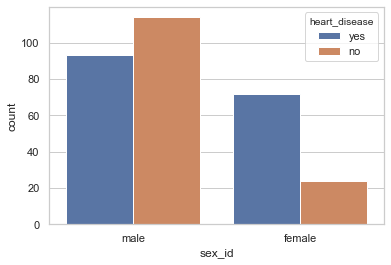

In [131]:
x = sns.countplot(x=sex_id, hue = heart_disease)

In [132]:
# How many patients have heart disease? 
heart_disease.value_counts()

yes    165
no     138
Name: heart_disease, dtype: int64

In [ ]:
# 165 patients have heart disease, 138 do not

In [141]:
df.groupby('sex_id')['heart_disease'].value_counts()

sex_id  heart_disease
female  yes               72
        no                24
male    no               114
        yes               93
Name: heart_disease, dtype: int64

In [142]:
sex_id.value_counts()

male      207
female     96
Name: sex_id, dtype: int64

In [143]:
# Of the 96 female patients, 72 have heart disease, 24 do not
# Of the 207 male patients, 96 have heart disease, 114 do not